# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import seaborn as sns
import locale
%matplotlib inline

locale.setlocale(locale.LC_ALL, 'es_VE.UTF-8')

# Define the "Set2" palette
palette = sns.color_palette()

# Update the palette dictionary with the new palette
colors = {
	# 'DP': palette[2],
	'GENETIC': palette[1],
	'GRASP': palette[2],
	'HEURISTICS': palette[3],
	'ITERATIVE_LS': palette[4],
	'LS_FLIP': palette[5],
	'LS_SWAP': palette[6],
	'SIMULATED_ANNEALING': palette[7],
	'TABU_SEARCH': palette[8],
	'MEMETIC': palette[9],
	'SCATTER_SEARCH': palette[0],
	'ANTS': palette[5],
}
def plot_algorithms(df, value, variable, y, title, ylabel, type="bar", logarithmic=False, zoom=False, format_value=True):
	fig, ax = plt.subplots(figsize=(10, 6))

	df_var = df[df[variable] == value]
	df_var = df_var.sort_values('Algorithm')
	results = df_var.groupby('Algorithm')[y].mean().reset_index()
	titleValue = value if not format_value else locale.format_string("%d", value, grouping=True)

	if type == "box":
		sns.boxplot(data=df_var, x='Algorithm', y=y, ax=ax, hue='Algorithm', palette=colors, legend=False)
		ax.legend([],[], frameon=False)  # Hide the legend
	else:
		sns.barplot(data=results, x='Algorithm', y=y, ax=ax, hue='Algorithm', palette=colors, legend=False)
		ax.legend([],[], frameon=False)  # Hide the legend


	ax.set_title(title + ' ' + titleValue)
	ax.set_xlabel('Algoritmo')
	ax.set_ylabel(ylabel)
	
	# Get current x-tick locations
	ticks_loc = ax.get_xticks()
	
	# Set the ticks using FixedLocator
	ax.xaxis.set_major_locator(FixedLocator(ticks_loc))
	
	# Now, safely set the tick labels with rotation
	ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

	if logarithmic:
		ax.set_yscale('log')

	if zoom:
		lower_bound = np.percentile(df[y], 25)  # 25th percentile
		upper_bound = np.percentile(df[y], 75)  # 75th percentile
		iqr = upper_bound - lower_bound  # Interquartile range
		ax.set_ylim([lower_bound - 1.5 * iqr, upper_bound + 1.5 * iqr])

	plt.tight_layout()
	plt.show()

def plot_algorithm_group(df, values, variable, y, title, ylabel, logarithmic=False, zoom=False, format_value=True, type="bar"):
	_, axs = plt.subplots(1, len(values), figsize=(len(values)**2, len(values)))

	for i, value in enumerate(values):
		df_var = df[df[variable] == value]
		df_var = df_var.sort_values('Algorithm')
		results = df_var.groupby('Algorithm')[y].mean().reset_index()
		
		titleValue = value if not format_value else locale.format_string("%d", value, grouping=True)

		
		ax = axs[i]
		if type == "box":
			sns.boxplot(data=df_var, x='Algorithm', y=y, ax=ax, hue='Algorithm', palette=colors, legend=False)
			ax.legend([],[], frameon=False)  # Hide the legend
		else:
			sns.barplot(data=results, x='Algorithm', y=y, ax=ax, hue='Algorithm', palette=colors, legend=False)
			ax.legend([],[], frameon=False)  # Hide the legend

		ax.set_title(title + ' ' + titleValue)
		ax.set_xlabel('Algoritmo')
		ax.set_ylabel(ylabel)
		ax.set_xticks(range(len(results['Algorithm'])))
		ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

		# Change the color of DP algorithm
		if df_var['Algorithm'].str.contains('DP').any():
			ax.patches[0].set_facecolor('g')

		if logarithmic:
			ax.set_yscale('log')

		if zoom:
			lower_bound = np.percentile(df[y], 25)  # 25th percentile
			upper_bound = np.percentile(df[y], 75)  # 75th percentile
			iqr = upper_bound - lower_bound  # Interquartile range
			ax.set_ylim([lower_bound - 1.5 * iqr, upper_bound + 1.5 * iqr])

	plt.tight_layout()
	plt.show()


In [2]:
raw = pd.read_csv('output.csv', sep=', ')

C:\Users\daniel\AppData\Local\Temp\ipykernel_10780\2117977691.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw = pd.read_csv('output.csv', sep=', ')


In [3]:
df = raw.copy()
df['Algorithm'] = df['Algorithm'].str.replace('KNAPSACK_', '')
df['Algorithm'] = df['Algorithm'].str.replace('LOCAL_SEARCH_', 'LS_')
df['Algorithm'] = df['Algorithm'].str.replace('_LOCAL_SEARCH', '_LS')
df.head()

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms)
0,knapPI_2_10000_10000_100,HEURISTICS,weakly correlated,10000,49805376,50229348,49953768,275580,151
1,knapPI_1_10000_10000_100,HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,150
2,knapPI_1_10000_10000_100,GENETIC,uncorrelated,10000,49805376,50106947,49741603,365344,7195
3,knapPI_1_10000_10000_100,TABU_SEARCH,uncorrelated,10000,49805376,50106947,49699955,406992,11512
4,knapPI_2_10000_10000_100,LS_FLIP,weakly correlated,10000,49805376,50229348,49910967,318381,16309


In [4]:
no_terminado = df[['Algorithm', 'Size', 'Capacity', 'Obtained']][df['Obtained'] == -1].sort_values(by=['Algorithm', 'Size', 'Capacity'])
no_terminado[no_terminado['Algorithm'] == 'DP']

,Algorithm,Size,Capacity,Obtained
68,DP,10000,49576995,-1
71,DP,10000,49576995,-1
60,DP,10000,49805376,-1
61,DP,10000,49805376,-1
70,DP,10000,49805376,-1
69,DP,10000,59477985,-1


In [5]:
no_terminado[no_terminado['Algorithm'] != 'DP']

,Algorithm,Size,Capacity,Obtained


In [6]:
df = df[df['Obtained'] != -1]

In [7]:
df['Accuracy (%)'] = df['Obtained'] / df['Expected'] * 100

# Analisis por numero de items

In [8]:
sizes = np.sort(df['Size'].unique())
size = sizes[0]

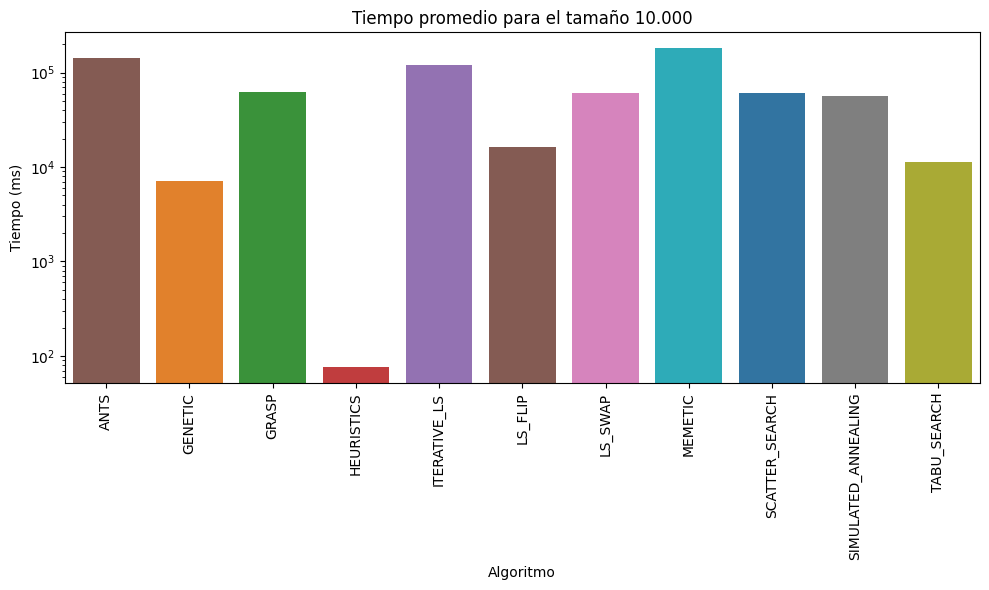

In [9]:
plot_algorithms(df, size, 'Size', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True)

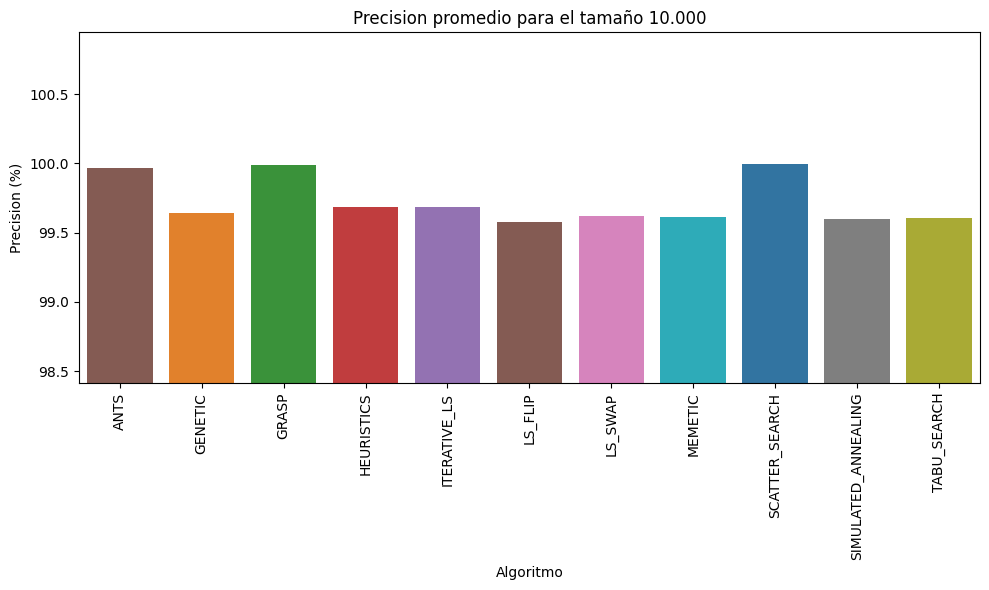

In [10]:
plot_algorithms(df, size, 'Size', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True)

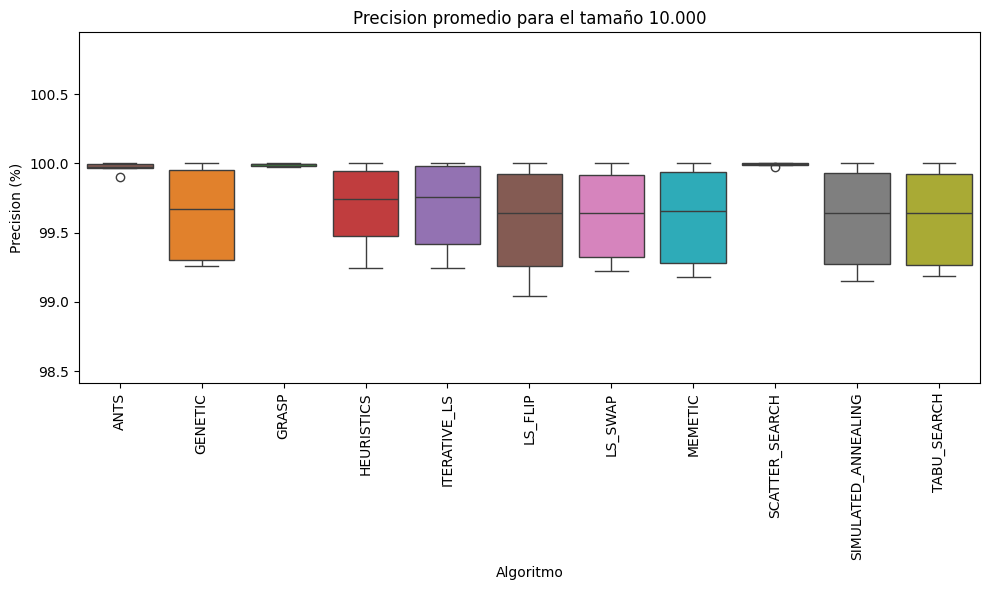

In [11]:
plot_algorithms(df, size, 'Size', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True, type='box')

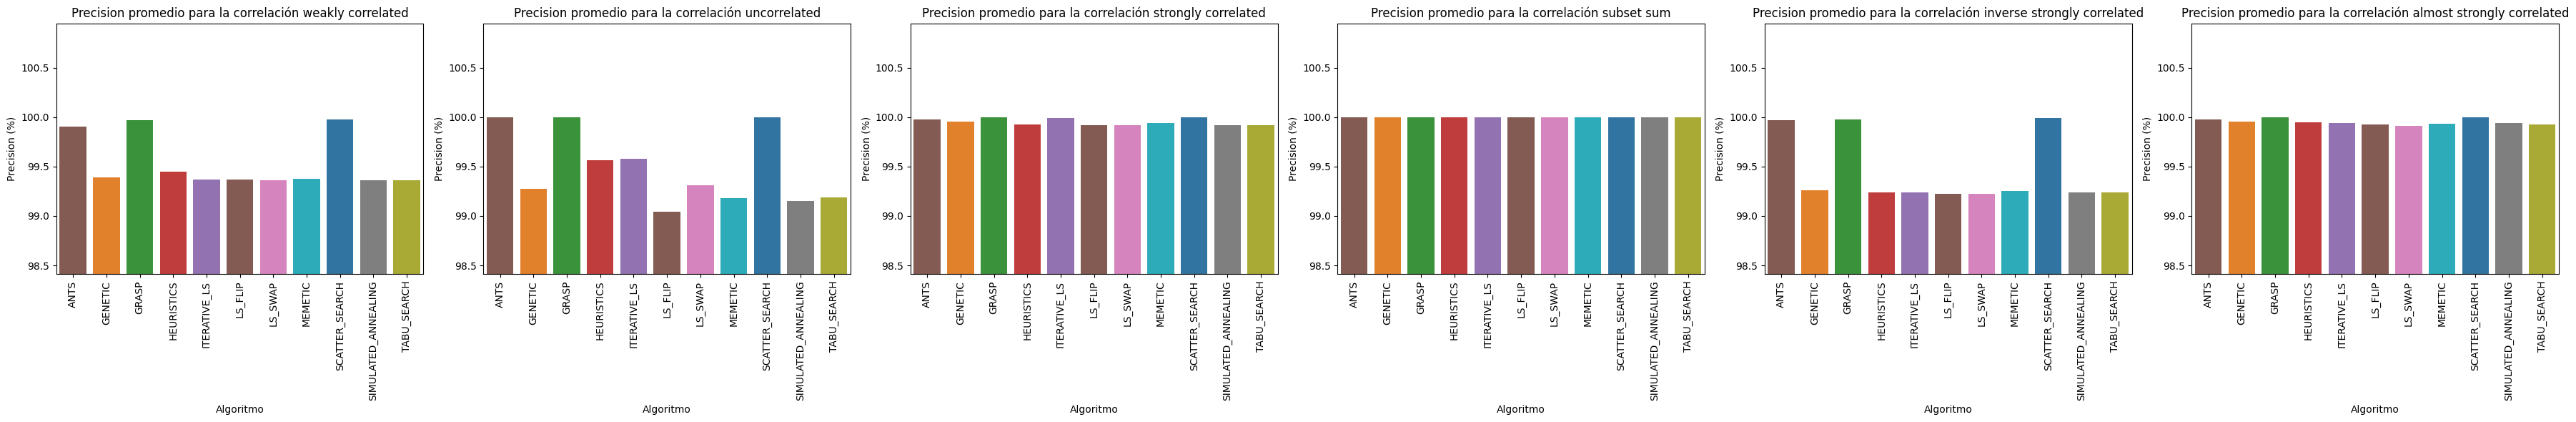

In [12]:
correlations = df['Correlation'].unique()
plot_algorithm_group(df, correlations, 'Correlation', 'Accuracy (%)', 'Precision promedio para la correlación', 'Precision (%)', zoom=True, format_value=False)

# Analisis por capacidad de la mochila

In [13]:
sorted_capacity = np.sort(df['Capacity'].unique())

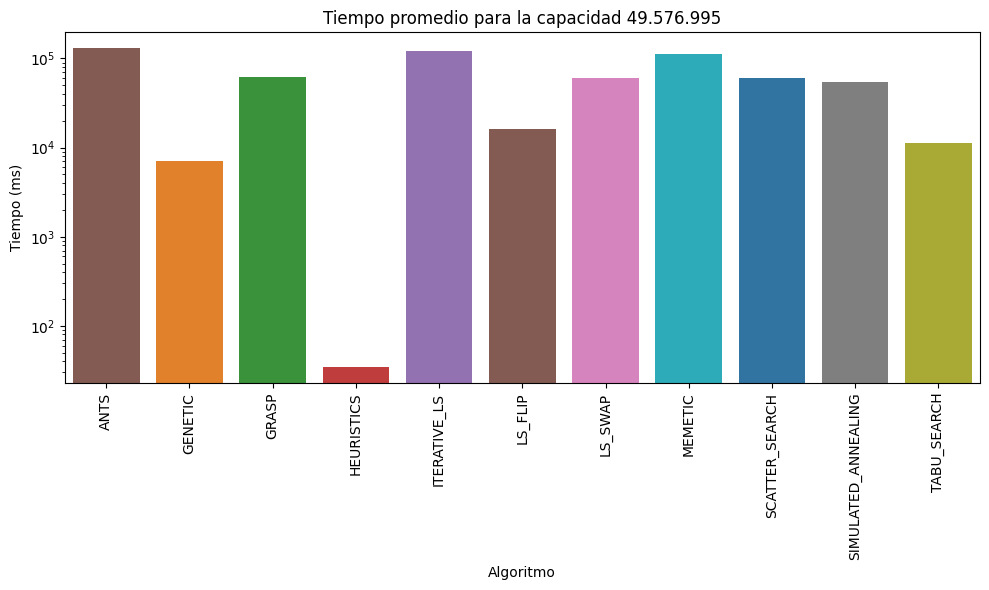

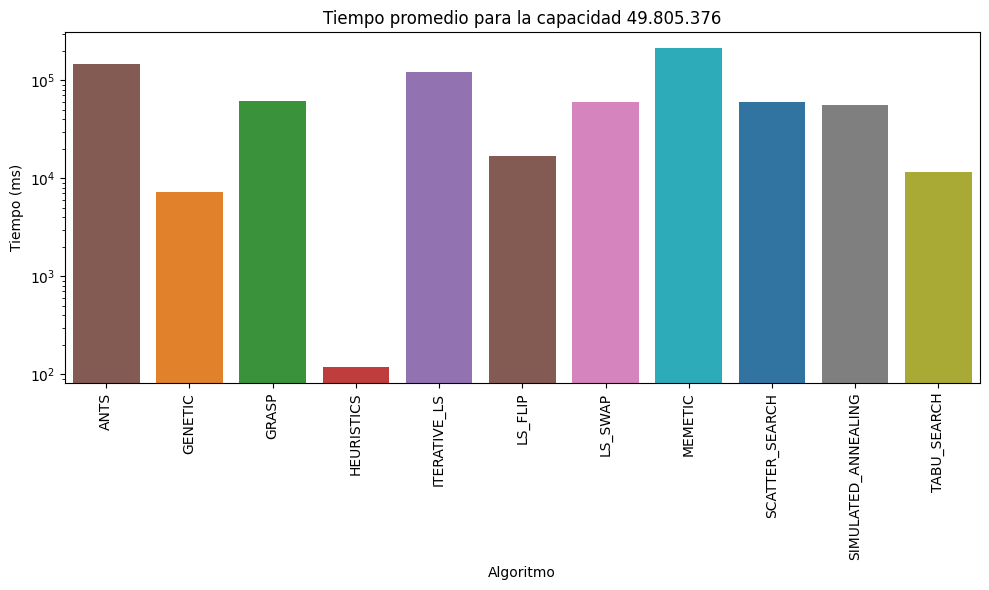

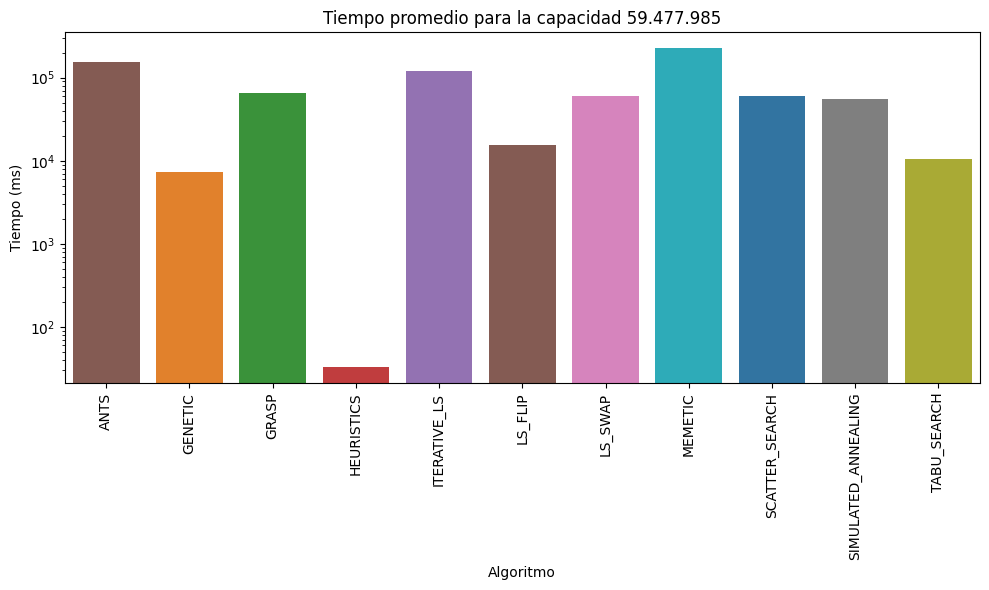

In [14]:
for capacity in sorted_capacity:
	plot_algorithms(df, capacity, 'Capacity', 'Time (ms)', 'Tiempo promedio para la capacidad', 'Tiempo (ms)', logarithmic=True)

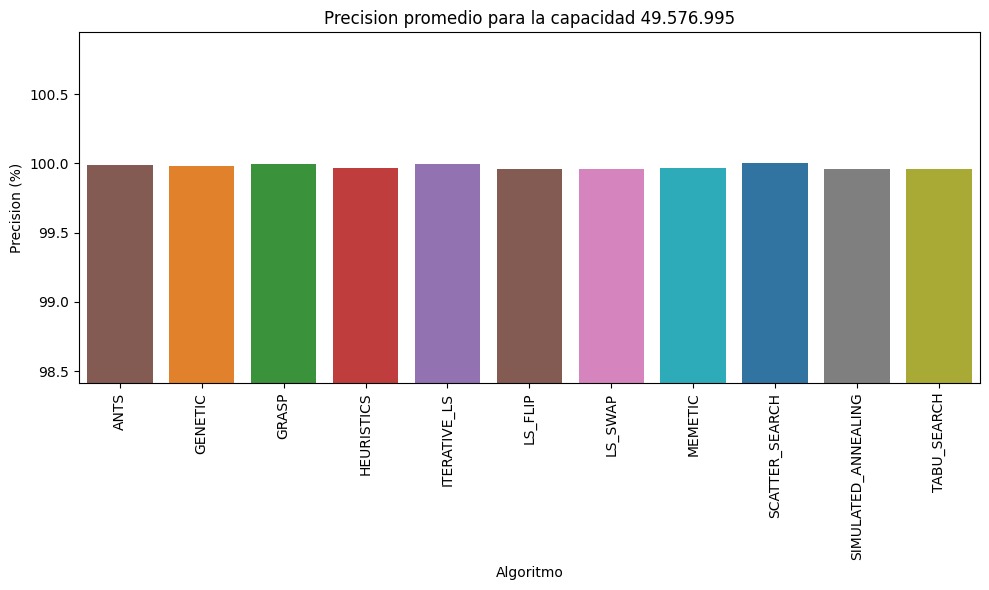

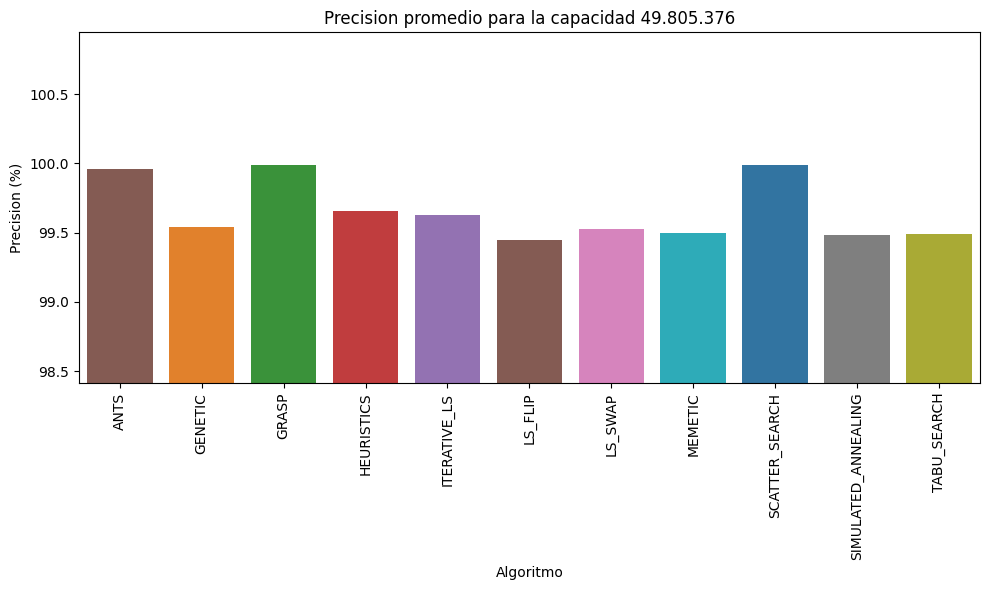

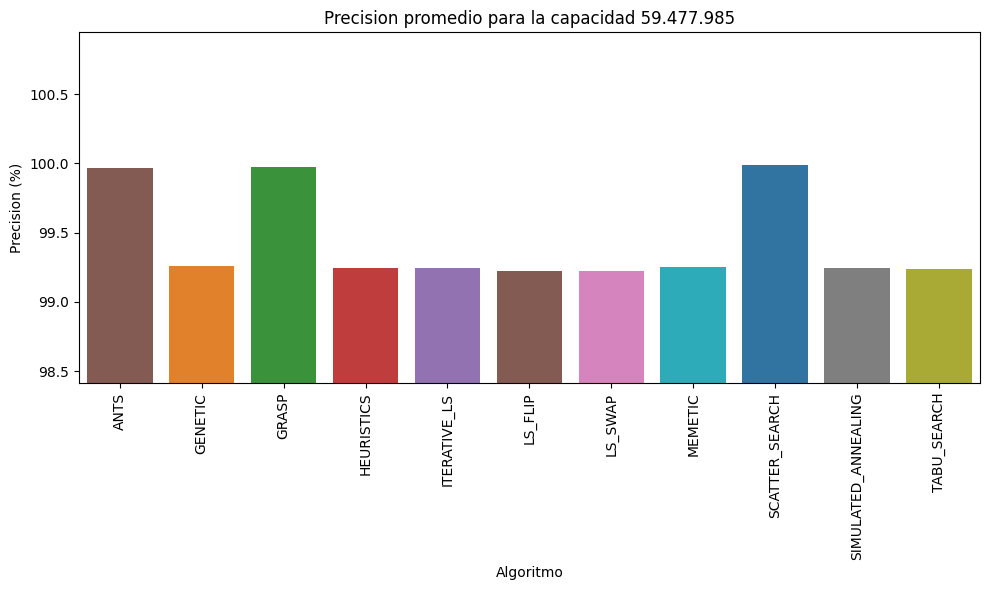

In [15]:
for capacity in sorted_capacity:
	plot_algorithms(df, capacity, 'Capacity', 'Accuracy (%)', 'Precision promedio para la capacidad', 'Precision (%)', zoom=True)

In [16]:
df.groupby('Algorithm')['Accuracy (%)'].mean().sort_values(ascending=False)

Algorithm
SCATTER_SEARCH         99.993937
GRASP                  99.989519
ANTS                   99.970070
HEURISTICS             99.688014
ITERATIVE_LS           99.686042
GENETIC                99.638283
LS_SWAP                99.621577
MEMETIC                99.613258
TABU_SEARCH            99.605571
SIMULATED_ANNEALING    99.600978
LS_FLIP                99.579293
Name: Accuracy (%), dtype: float64

In [17]:
df['nxC Size'] = df['Size'] * df['Capacity']
df.sort_values(['nxC Size', 'Algorithm'])

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms),Accuracy (%),nxC Size
20,knapPI_6_10000_10000_100,ANTS,subset sum,10000,49576995,49576995,49576974,21,115250,99.999958,495769950000
46,knapPI_3_10000_10000_100,ANTS,strongly correlated,10000,49576995,59526995,59513537,13458,145032,99.977392,495769950000
19,knapPI_3_10000_10000_100,GENETIC,strongly correlated,10000,49576995,59526995,59500946,26049,6664,99.956240,495769950000
53,knapPI_6_10000_10000_100,GENETIC,subset sum,10000,49576995,49576995,49576995,0,7362,100.000000,495769950000
27,knapPI_3_10000_10000_100,GRASP,strongly correlated,10000,49576995,59526995,59524688,2307,60365,99.996124,495769950000
...,...,...,...,...,...,...,...,...,...,...,...
32,knapPI_4_10000_10000_100,LS_SWAP,inverse strongly correlated,10000,59477985,49958985,49571984,387001,60011,99.225363,594779850000
63,knapPI_4_10000_10000_100,MEMETIC,inverse strongly correlated,10000,59477985,49958985,49584354,374631,225705,99.250123,594779850000
38,knapPI_4_10000_10000_100,SCATTER_SEARCH,inverse strongly correlated,10000,59477985,49958985,49954045,4940,60068,99.990112,594779850000
34,knapPI_4_10000_10000_100,SIMULATED_ANNEALING,inverse strongly correlated,10000,59477985,49958985,49579982,379003,55978,99.241372,594779850000


# Analisis $n\times C$

In [18]:
df['nxC'] = df['Size'].apply(lambda x: locale.format_string("%d", x, grouping=True)) + 'x' + df['Capacity'].apply(lambda x: locale.format_string("%d", x, grouping=True))
nxC = df.sort_values(['Size', 'Capacity'])['nxC'].unique()
nxC

array(['10.000x49.576.995', '10.000x49.805.376', '10.000x59.477.985'],
      dtype=object)

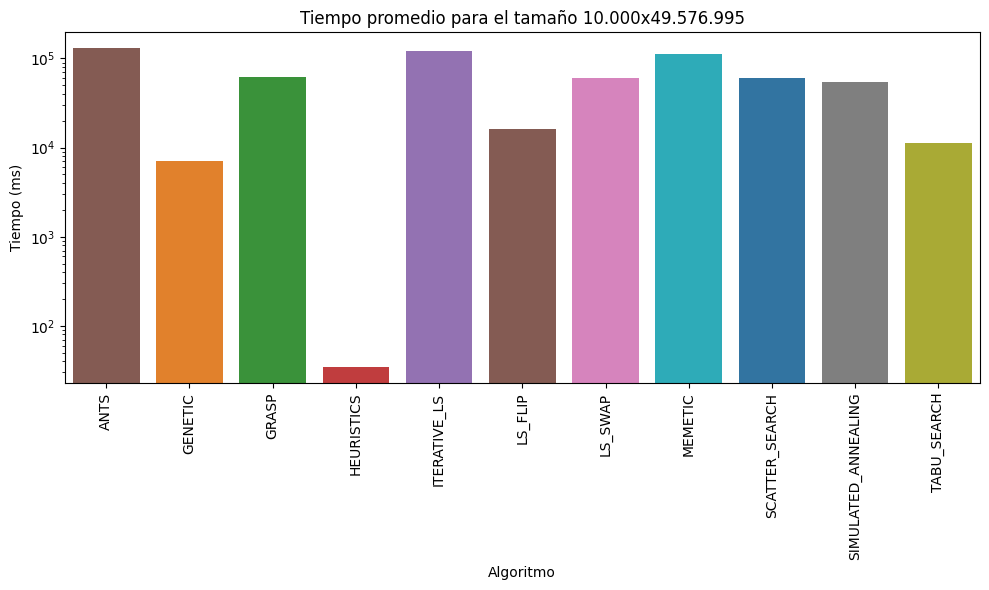

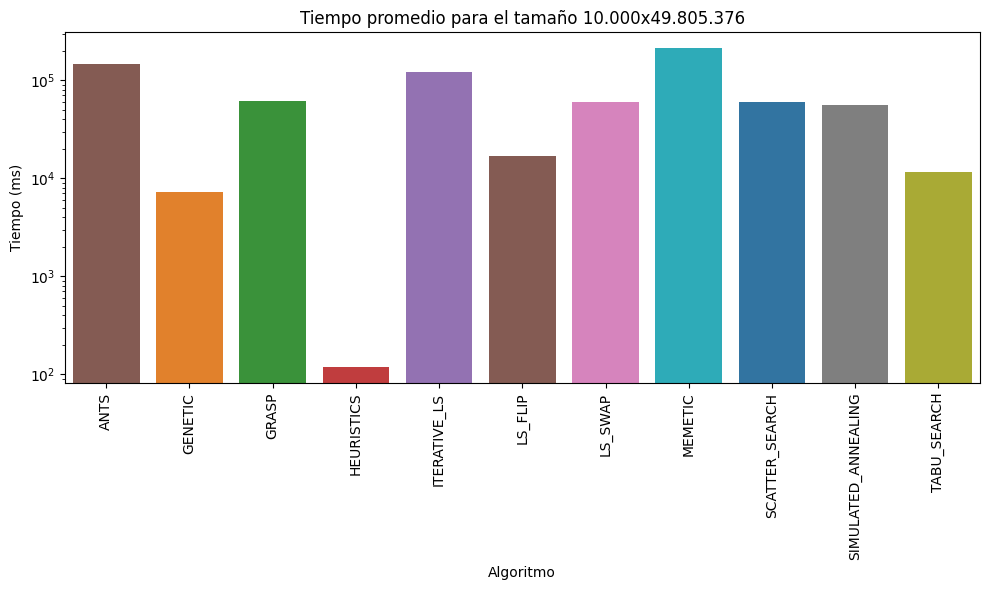

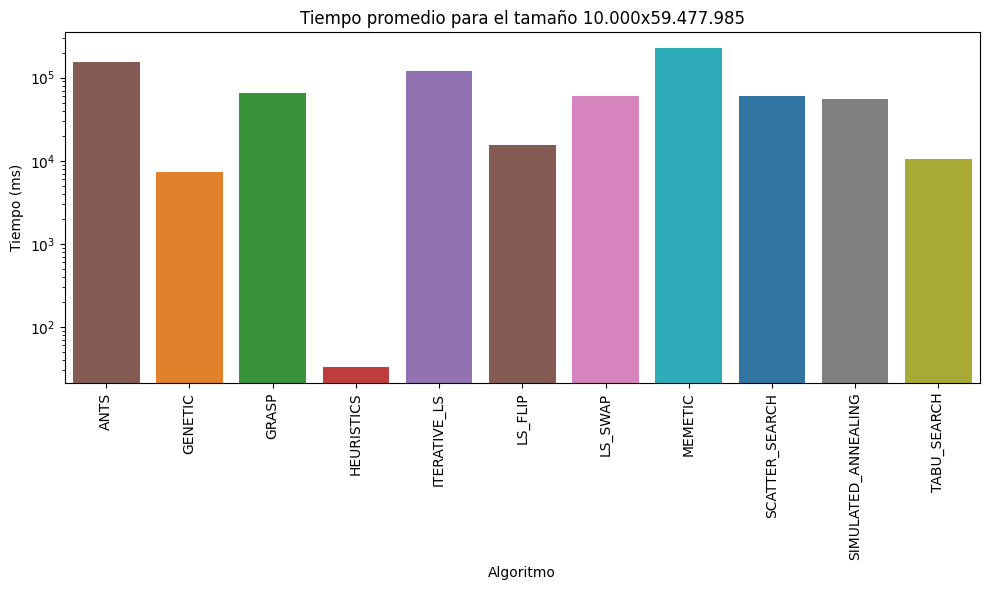

In [19]:
for x in nxC:
	plot_algorithms(df, x, 'nxC', 'Time (ms)', 'Tiempo promedio para el tamaño', 'Tiempo (ms)', logarithmic=True, format_value=False)

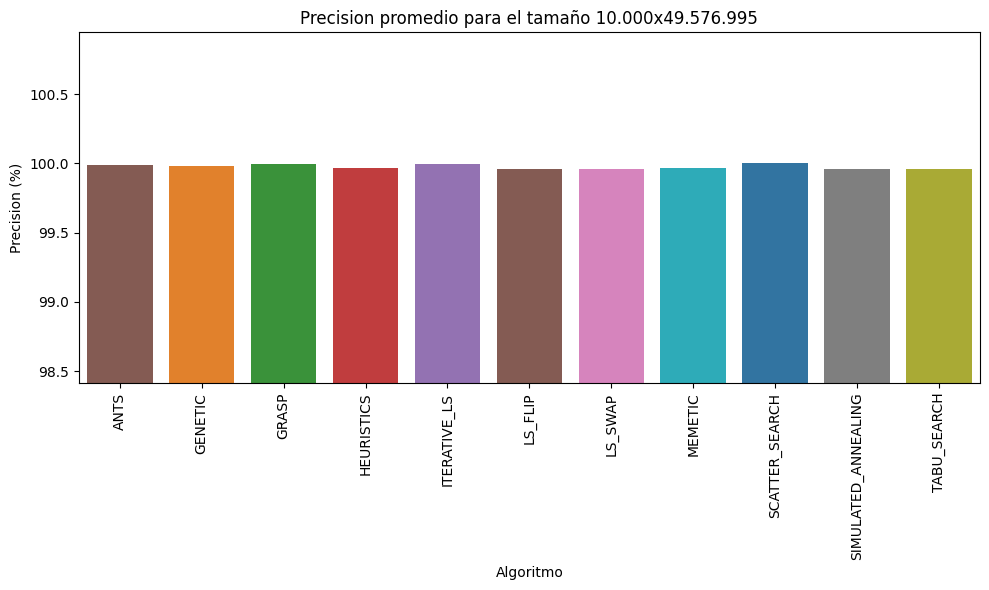

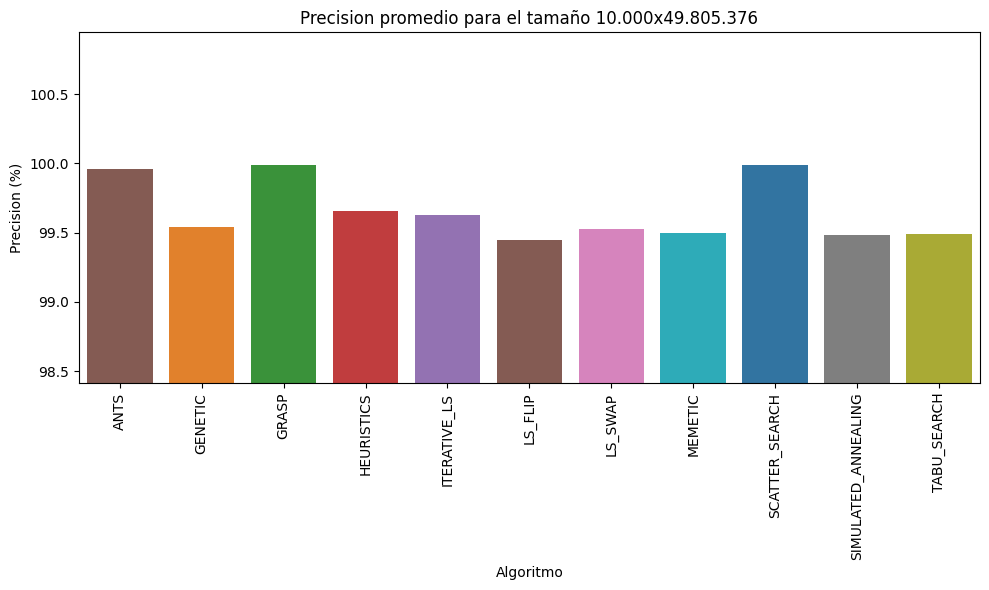

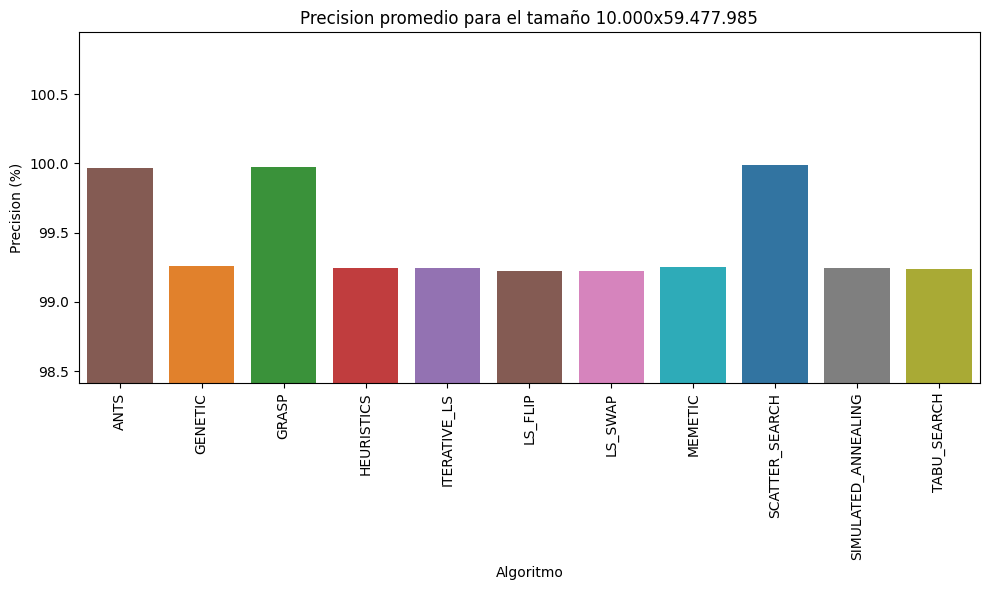

In [20]:
for x in nxC:
	plot_algorithms(df, x, 'nxC', 'Accuracy (%)', 'Precision promedio para el tamaño', 'Precision (%)', zoom=True, format_value=False)

# Tabla

In [21]:
df.sort_values(['Error', 'nxC Size', 'Time (ms)'])

,Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms),Accuracy (%),nxC Size,nxC
55,knapPI_6_10000_10000_100,MEMETIC,subset sum,10000,49576995,49576995,49576995,0,5323,100.000000,495769950000,10.000x49.576.995
53,knapPI_6_10000_10000_100,GENETIC,subset sum,10000,49576995,49576995,49576995,0,7362,100.000000,495769950000,10.000x49.576.995
66,knapPI_6_10000_10000_100,ITERATIVE_LS,subset sum,10000,49576995,49576995,49576990,5,120484,99.999990,495769950000,10.000x49.576.995
64,knapPI_6_10000_10000_100,SCATTER_SEARCH,subset sum,10000,49576995,49576995,49576985,10,60056,99.999980,495769950000,10.000x49.576.995
56,knapPI_6_10000_10000_100,LS_SWAP,subset sum,10000,49576995,49576995,49576979,16,60032,99.999968,495769950000,10.000x49.576.995
...,...,...,...,...,...,...,...,...,...,...,...,...
26,knapPI_4_10000_10000_100,LS_FLIP,inverse strongly correlated,10000,59477985,49958985,49571829,387156,15503,99.225052,594779850000,10.000x59.477.985
3,knapPI_1_10000_10000_100,TABU_SEARCH,uncorrelated,10000,49805376,50106947,49699955,406992,11512,99.187753,498053760000,10.000x49.805.376
39,knapPI_1_10000_10000_100,MEMETIC,uncorrelated,10000,49805376,50106947,49696621,410326,222170,99.181100,498053760000,10.000x49.805.376
8,knapPI_1_10000_10000_100,SIMULATED_ANNEALING,uncorrelated,10000,49805376,50106947,49680389,426558,58883,99.148705,498053760000,10.000x49.805.376


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import sys
df.to_csv(sys.stdout, index=False)

Instance,Algorithm,Correlation,Size,Capacity,Expected,Obtained,Error,Time (ms),Accuracy (%),nxC Size,nxC
knapPI_2_10000_10000_100,HEURISTICS,weakly correlated,10000,49805376,50229348,49953768,275580,151,99.45135660530573,498053760000,10.000x49.805.376
knapPI_1_10000_10000_100,HEURISTICS,uncorrelated,10000,49805376,50106947,49886890,220057,150,99.56082536818697,498053760000,10.000x49.805.376
knapPI_1_10000_10000_100,GENETIC,uncorrelated,10000,49805376,50106947,49741603,365344,7195,99.27087156198121,498053760000,10.000x49.805.376
knapPI_1_10000_10000_100,TABU_SEARCH,uncorrelated,10000,49805376,50106947,49699955,406992,11512,99.18775334685628,498053760000,10.000x49.805.376
knapPI_2_10000_10000_100,LS_FLIP,weakly correlated,10000,49805376,50229348,49910967,318381,16309,99.36614546539604,498053760000,10.000x49.805.376
knapPI_1_10000_10000_100,LS_FLIP,uncorrelated,10000,49805376,50106947,49625719,481228,17106,99.03959824173681,498053760000,10.000x49.805.376
knapPI_2_10000_10000_100,TABU_SEAR